In [220]:
import pandas as pd
from pathlib import Path
import torch
from torch.utils.data import Dataset, DataLoader

In [221]:
data_path = Path('data')

In [222]:
reranked_results_alibaba = pd.read_parquet(data_path / 'reranked_results_alibaba_finetuned.parquet')
reranked_results_tinybert = pd.read_parquet(data_path / 'reranked_results_tinyBERT_finetuned.parquet')
reranked_results_alibaba_multilingual = pd.read_parquet(data_path / 'reranked_results_alibaba_multilingual_finetuned.parquet')
reranked_results_electra = pd.read_parquet(data_path / 'reranked_results_electra_finetuned.parquet')
reranked_results_miniLM6 = pd.read_parquet(data_path / 'reranked_results_miniLM6_finetuned.parquet')
reranked_results_miniLM12 = pd.read_parquet(data_path / 'reranked_results_miniLM12_finetuned.parquet')
reranked_results_mxbai = pd.read_parquet(data_path / 'reranked_results_mxbai.parquet')


In [223]:
# calc rrf with rank and with score?

# rank

# df with post_id, gt, results for every reranker
# merge dataframes on post_id only keep post_id, cord_uid, reranked_topk using the reranker name as suffix

dfs = [
        reranked_results_alibaba[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_alibaba'}),
        # reranked_results_tinybert[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_tinybert'}),
        reranked_results_alibaba_multilingual[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_alibaba_multilingual'}),
        # reranked_results_electra[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_electra'}),
        # reranked_results_miniLM6[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_miniLM6'}),
        # reranked_results_miniLM12[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_miniLM12'}),
        reranked_results_mxbai[['post_id', 'cord_uid', 'reranked_topk']].rename(columns={'reranked_topk': 'reranked_topk_mxbai'}),
        ]


merged_df = dfs[0]
merged_df
for df in dfs[1:]:
    # add reranked_topk column to merged_df
    merged_df = merged_df.merge(df.drop(columns=['cord_uid']), on='post_id', how='inner')

merged_df



,post_id,cord_uid,reranked_topk_alibaba,reranked_topk_alibaba_multilingual,reranked_topk_mxbai
0,16,3qvh482o,"[8t2tic9n, 00ia8k0b, 6mfd3n4s, o4vvlmr4, 59up4...","[59up4v56, 82y56t7d, 8t2tic9n, n2kn7o67, 6mfd3...","[8t2tic9n, 6mfd3n4s, o4vvlmr4, 5hxsagx6, styav..."
1,69,r58aohnu,"[r58aohnu, yrowv62k, eay6qfhz, iu1d9i57, kiq6x...","[r58aohnu, kiq6xb6k, s2vckt2w, eay6qfhz, 70ine...","[r58aohnu, yrowv62k, tgd6gy3z, tu1vevx9, pdiyq..."
2,73,sts48u9i,"[sts48u9i, 1uto8vrp, geo7ac5i, gruir7aw, 3xw4q...","[sts48u9i, o47v5vgw, o877uul1, tz2shoso, gruir...","[sts48u9i, gruir7aw, o47v5vgw, o877uul1, mbam5..."
3,93,3sr2exq9,"[3sr2exq9, k0f4cwig, 8j3bb6zx, sv48gjkk, kdegn...","[3sr2exq9, k0f4cwig, sv48gjkk, 8j3bb6zx, tx8yp...","[3sr2exq9, k0f4cwig, sv48gjkk, 8j3bb6zx, kdegn..."
4,96,ybwwmyqy,"[ybwwmyqy, ouvq2wpq, rs3umc1x, 3l6ipiwk, lzddn...","[ybwwmyqy, rs3umc1x, ouvq2wpq, 3l6ipiwk, ierqf...","[ybwwmyqy, ierqfgo5, ouvq2wpq, 3l6ipiwk, vabb2..."
...,...,...,...,...,...
14248,14248,9169o29b,"[jgq968f6, 1y1ik2u9, dgng39yd, s2hp3sat, 4p6fc...","[l9lni5d3, jgq968f6, 1y1ik2u9, tz2shoso, dgng3...","[9169o29b, jgq968f6, s2hp3sat, dgng39yd, oywha..."
14249,14249,s2bpha8l,"[s2bpha8l, 8a3fp7ym, k8v832rl, jkdyo2zp, 3a7ut...","[s2bpha8l, 8a3fp7ym, k8v832rl, nwb7qf9l, zuepr...","[s2bpha8l, 8a3fp7ym, 3a7utmsd, jkdyo2zp, 5nt99..."
14250,14250,atloc9th,"[7s79900j, 7y6ok9a2, e0pbs354, 848jmwgc, wdvuw...","[e0pbs354, 7s79900j, 7y6ok9a2, lavcsqov, j5vhn...","[7s79900j, e0pbs354, 848jmwgc, y7s6qt6j, 7y6ok..."
14251,14251,t4y1ylb3,"[7a543f7v, t4y1ylb3, ws3tfs1j, 0o7rm667, ro3k6...","[7a543f7v, t4y1ylb3, ws3tfs1j, 6mzqk12f, cj3cp...","[t4y1ylb3, 7a543f7v, 5vx2ylui, ws3tfs1j, sjsaw..."


In [224]:
merged_df.columns[2:]

Index(['reranked_topk_alibaba', 'reranked_topk_alibaba_multilingual',
       'reranked_topk_mxbai'],
      dtype='object')

In [225]:
# for each document in set of reraked documents calculate RRF, if 

# for each row on merged df, get set of reranked documents across all rerankers, for each document in set of reranked documents s


def calculate_rrf_scores(row, reranker_columns, k=1):
    reranked_docs = set()
    for col in reranker_columns:
        reranked_docs.update(row[col])
    
    scores = {doc: 0 for doc in reranked_docs}
    for col in reranker_columns:
        for doc in row[col]:
            rank = list(row[col]).index(doc) + 1
            scores[doc] += 1 / (rank + k)
    
    return scores
                            
def get_final_ranking(row, scores):
    return sorted(scores.keys(), key=lambda x: scores[x], reverse=True)

# Define reranker columns
reranker_columns = merged_df.columns[2:]

# Calculate RRF scores and final ranking for each row
merged_df['rrf_scores'] = merged_df.apply(lambda row: calculate_rrf_scores(row, reranker_columns), axis=1)
merged_df['final_ranking'] = merged_df.apply(lambda row: get_final_ranking(row, row['rrf_scores']), axis=1)

def get_performance_mrr(data, col_gold, col_pred, list_k = [1, 5, 10]):
    d_performance = {}
    for k in list_k:
        data["in_topx"] = data.apply(lambda x: (1/([i for i in x[col_pred][:k]].index(x[col_gold]) + 1) if x[col_gold] in [i for i in x[col_pred][:k]] else 0), axis=1)
        d_performance[k] = data["in_topx"].mean()
        print(f"{k = }")
        in_topx = data["in_topx"] > 0
        print(f"Number of queries in top {k}: {in_topx.sum()}")
        print(f"Number of queries not in top {k}: {len(data) - in_topx.sum()}")
    return d_performance

def evaluate_reranked_results(df_query, col_gold='cord_uid', col_pred='reranked_topk', list_k=[1, 5, 10]):
    return get_performance_mrr(df_query, col_gold, col_pred, list_k)


evaluate_reranked_results(merged_df, col_gold='cord_uid', col_pred='final_ranking', list_k=[1, 5, 10])
evaluate_reranked_results(merged_df, col_gold='cord_uid', col_pred='reranked_topk_mxbai', list_k=[1, 5, 10])

k = 1
Number of queries in top 1: 9834
Number of queries not in top 1: 4419
k = 5
Number of queries in top 5: 11199
Number of queries not in top 5: 3054
k = 10
Number of queries in top 10: 11402
Number of queries not in top 10: 2851
k = 1
Number of queries in top 1: 9784
Number of queries not in top 1: 4469
k = 5
Number of queries in top 5: 11050
Number of queries not in top 5: 3203
k = 10
Number of queries in top 10: 11274
Number of queries not in top 10: 2979


{1: np.float64(0.6864519750228022),
 5: np.float64(0.7231974555064431),
 10: np.float64(0.7253506362904384)}

Using reranker columns for plot: ['reranked_topk_alibaba', 'reranked_topk_alibaba_multilingual', 'reranked_topk_mxbai', 'rrf_scores']
Testing RRF k = 0
k = 1
Number of queries in top 1: 9772
Number of queries not in top 1: 4481
k = 5
Number of queries in top 5: 11156
Number of queries not in top 5: 3097
k = 10
Number of queries in top 10: 11395
Number of queries not in top 10: 2858
Testing RRF k = 1
k = 1
Number of queries in top 1: 9739
Number of queries not in top 1: 4514
k = 5
Number of queries in top 5: 11168
Number of queries not in top 5: 3085
k = 10
Number of queries in top 10: 11392
Number of queries not in top 10: 2861
Testing RRF k = 2
k = 1
Number of queries in top 1: 9633
Number of queries not in top 1: 4620
k = 5
Number of queries in top 5: 11162
Number of queries not in top 5: 3091
k = 10
Number of queries in top 10: 11396
Number of queries not in top 10: 2857
Testing RRF k = 3
k = 1
Number of queries in top 1: 9541
Number of queries not in top 1: 4712
k = 5
Number of que

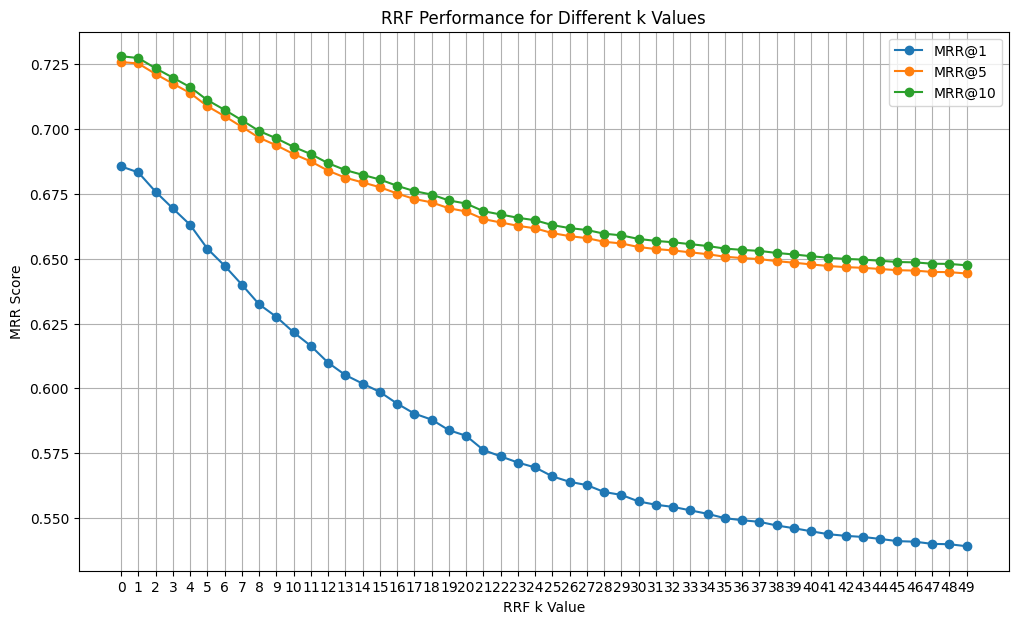

In [218]:
import matplotlib.pyplot as plt

def find_optimal_k_rrf_and_plot(df, reranker_cols, k_values_to_test, mrr_thresholds=[1, 5, 10]):
    """
    Iterates through k values for RRF, calculates MRR, and plots the results.

    Args:
        df (pd.DataFrame): The merged dataframe with reranker results.
        reranker_cols (list): List of column names for reranked document lists.
        k_values_to_test (list or range): A list or range of k values for RRF.
        mrr_thresholds (list): List of k values for MRR calculation (e.g., [1, 5, 10]).
    """
    results_over_k = {mrr_k: [] for mrr_k in mrr_thresholds}
    temp_df = df.copy() # Work on a copy to avoid modifying the original df repeatedly

    for rrf_k_val in k_values_to_test:
        print(f"Testing RRF k = {rrf_k_val}")
        # Calculate RRF scores and final ranking for each row with the current rrf_k_val
        temp_df['rrf_scores_temp'] = temp_df.apply(lambda row: calculate_rrf_scores(row, reranker_cols, k=rrf_k_val), axis=1)
        temp_df['final_ranking_temp'] = temp_df.apply(lambda row: get_final_ranking(row, row['rrf_scores_temp']), axis=1)
        
        # Evaluate performance
        # Note: get_performance_mrr modifies the dataframe by adding 'in_topx', 
        # so we pass a copy of the relevant columns or ensure it's handled.
        eval_df_copy = temp_df[['cord_uid', 'final_ranking_temp']].copy()
        performance = get_performance_mrr(eval_df_copy, 'cord_uid', 'final_ranking_temp', list_k=mrr_thresholds)
        
        for mrr_k in mrr_thresholds:
            results_over_k[mrr_k].append(performance.get(mrr_k, 0))
            
    # Plotting the results
    plt.figure(figsize=(12, 7))
    for mrr_k in mrr_thresholds:
        plt.plot(k_values_to_test, results_over_k[mrr_k], marker='o', linestyle='-', label=f'MRR@{mrr_k}')
    
    plt.title('RRF Performance for Different k Values')
    plt.xlabel('RRF k Value')
    plt.ylabel('MRR Score')
    plt.xticks(k_values_to_test)
    plt.legend()
    plt.grid(True)
    plt.show()

    return results_over_k

# Define reranker columns (if not already defined)
reranker_columns_for_plot = merged_df.columns[2:-2] # Exclude post_id, cord_uid, rrf_scores, final_ranking if they exist
k_test_range = range(0, 50, 1)  # Test k from 10 to 100 with a step of 10

print(f"Using reranker columns for plot: {list(reranker_columns_for_plot)}")
optimization_results = find_optimal_k_rrf_and_plot(merged_df, reranker_columns_for_plot, k_test_range)